
Nama:Pebiyan Firmansyah
Email:pebiyanfirmansyah22@gmail.com
no.telp:089616061025

1.mendownload dataset dari kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d mrsimple07/obesity-prediction

  0% 0.00/32.0k [00:00<?, ?B/s]
100% 32.0k/32.0k [00:00<00:00, 53.8MB/s]


2.mengimport library yang dibutuhkan

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

3.mengextract dataset

In [ ]:
local_zip='/content/obesity-prediction.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()
!rm -rf

4.membaca dataset

In [ ]:
#membaca dataset
obes =  pd.read_csv('/content/obesity_data.csv')
obes

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight



5.Mengecek dataset,
Jumlah dataset=1000

In [ ]:
obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


6.visulisasikan jumlah data non numerik

                        jumlah sampel  persentase
Gender ObesityCategory                           
Male   Normal weight              206        20.6
Female Normal weight              165        16.5
       Overweight                 155        15.5
Male   Overweight                 140        14.0
       Obese                       99         9.9
Female Obese                       92         9.2
Male   Underweight                 78         7.8
Female Underweight                 65         6.5


<Axes: title={'center': 'Gender'}, xlabel='Gender,ObesityCategory'>

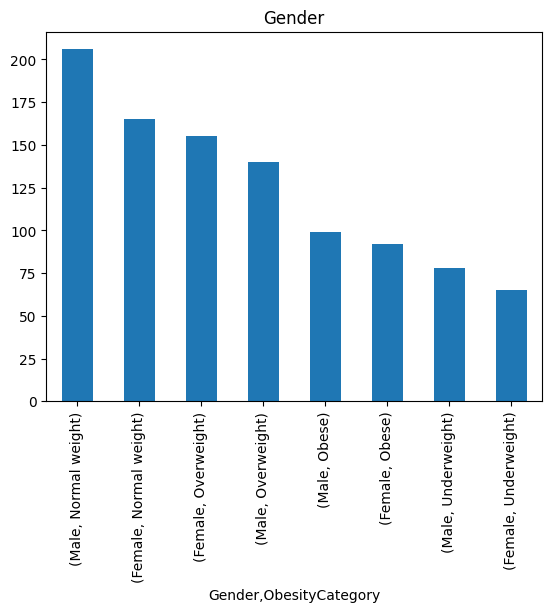

In [ ]:
feature = ['Gender','ObesityCategory']
count = obes[feature].value_counts()
percent = 100*obes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature[0])

                 jumlah sampel  persentase
ObesityCategory                           
Normal weight              371        37.1
Overweight                 295        29.5
Obese                      191        19.1
Underweight                143        14.3


<Axes: title={'center': 'ObesityCategory'}, xlabel='ObesityCategory'>

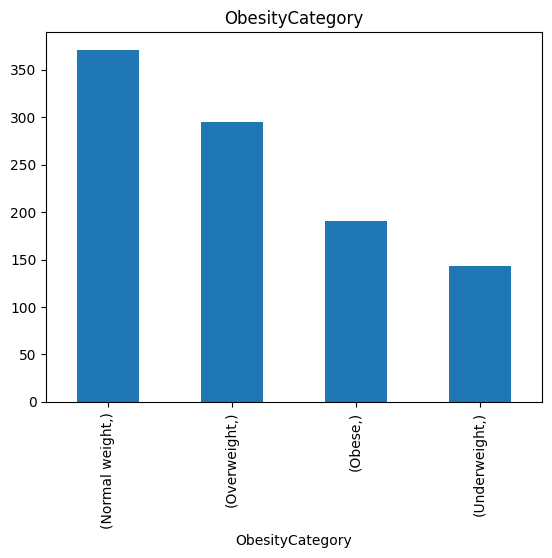

In [ ]:
feature = ['ObesityCategory']
count = obes[feature].value_counts()
percent = 100*obes[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature[0])

7.visulisasi pada data numerik

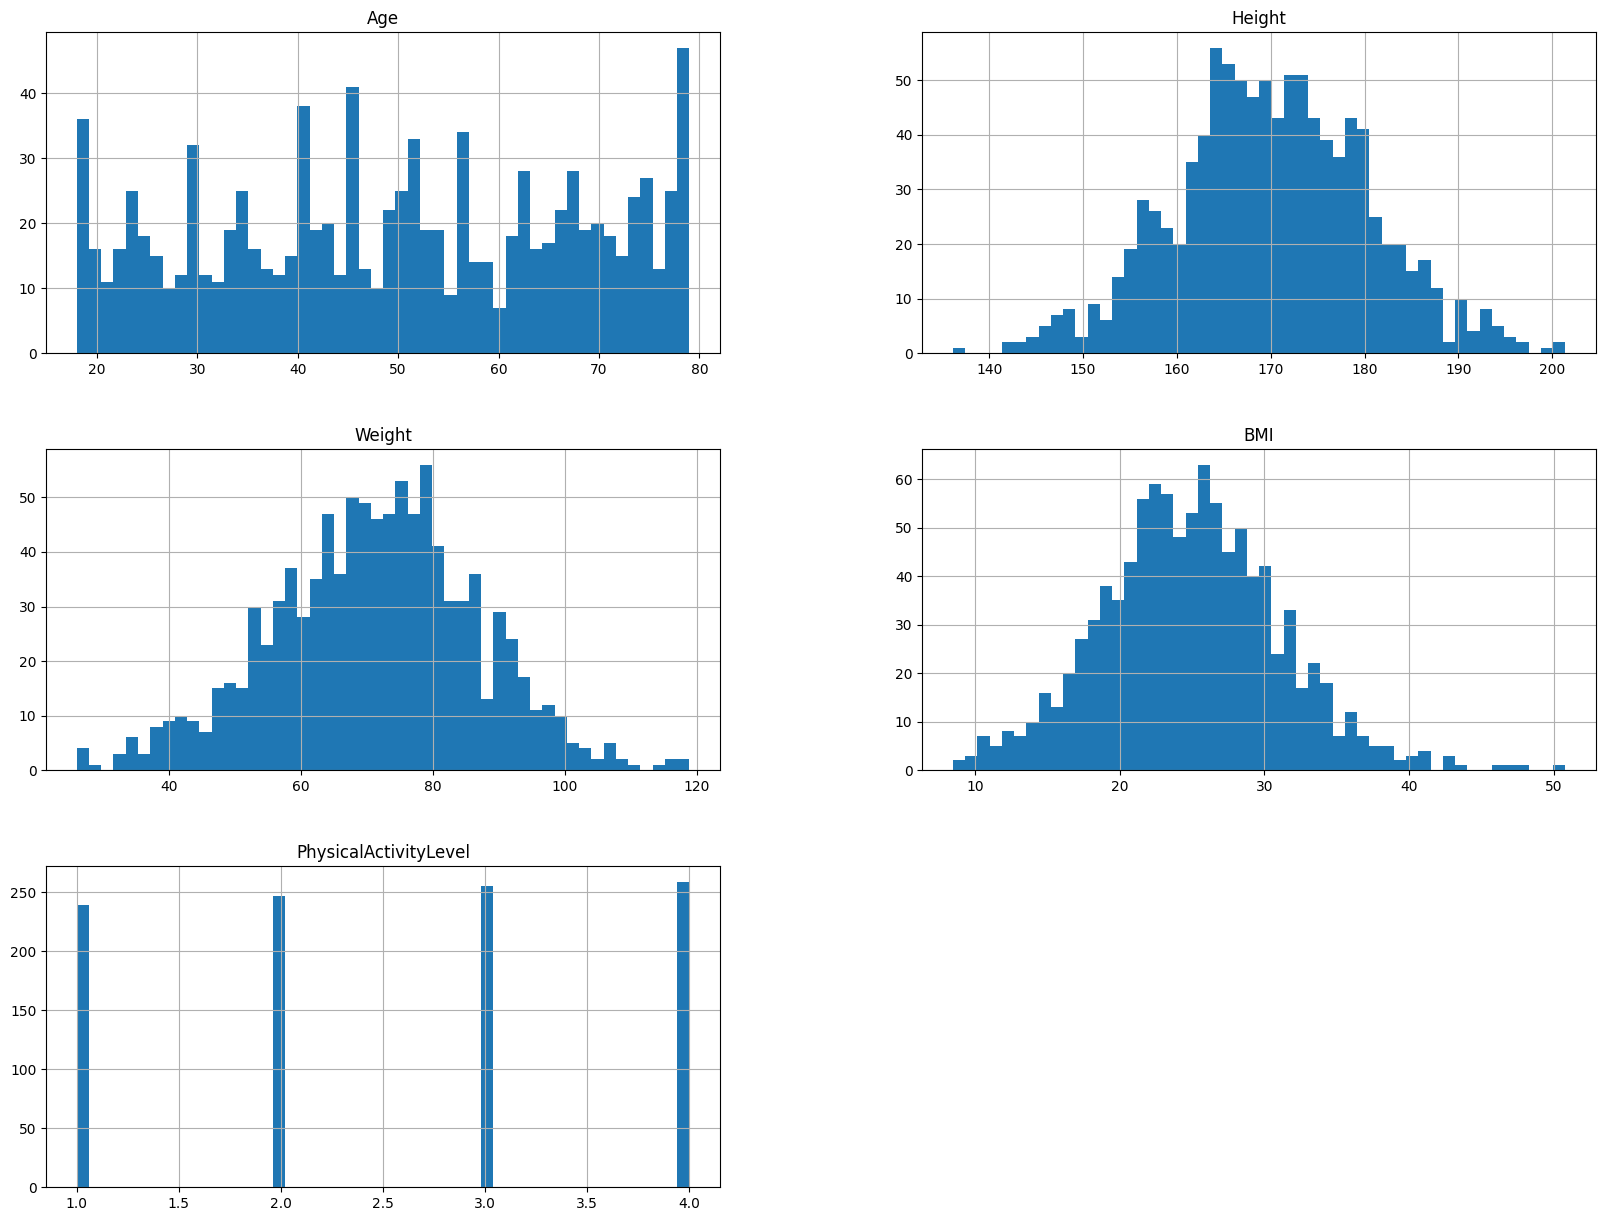

In [ ]:
obes.hist(bins=50, figsize=(20,15))
plt.show()

8.melakukan one hot encoding untuk data non numerik

In [ ]:
from sklearn.preprocessing import OneHotEncoder
obes=pd.concat([obes,pd.get_dummies(obes['Gender'],prefix='Gender')],axis=1)
obes.drop(['Gender'],axis=1,inplace=True)
obes.head()

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Female,Gender_Male
0,56,173.575262,71.982051,23.891783,4,Normal weight,0,1
1,69,164.127306,89.959256,33.395209,2,Obese,0,1
2,46,168.072202,72.930629,25.817737,4,Overweight,1,0
3,32,168.459633,84.886912,29.912247,3,Overweight,0,1
4,60,183.568568,69.038945,20.487903,3,Normal weight,0,1


9.memisah dataset

In [ ]:
from sklearn.model_selection import train_test_split
X=obes[['Age','Height','Weight','BMI','PhysicalActivityLevel','Gender_Female']]
y=obes['ObesityCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

10.menggunakan model random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

11.menggunakan model svm

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

12.menggunakan model logisticregression

In [ ]:
from sklearn import linear_model
LG = linear_model.LogisticRegression()
LG.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

13.membuat dictionary untuk setiap algoritma

In [ ]:
model_dict = { 'RF': rf,'SVM':svm,'LG':LG}

14.membuat dataframe acc

In [ ]:
#membuat datafrane acc
acc = pd.DataFrame(columns=['train', 'test'], index=['SVM','RF','Logistic'])
model_dict = {'RF': rf,'SVM' : svm,'Logistic':LG}
for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))*100
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))*100

acc

,train,test
SVM,98.75,99.0
RF,100.0,99.5
Logistic,96.25,96.5
